In [1]:
pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext google.cloud.bigquery
%matplotlib inline

In [3]:
%%bigquery posts_topten
SELECT
  title,
  `by`,
  url,
  `score`
FROM
  `bigquery-public-data.hacker_news.stories`
ORDER BY
  score DESC
LIMIT
  10

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.66rows/s]


<AxesSubplot:xlabel='title'>

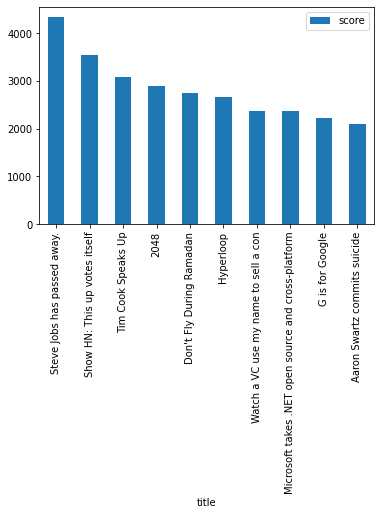

In [4]:
posts_topten.plot(kind="bar",x="title",y="score")

In [5]:
%%bigquery total_births
SELECT
  source_year AS year,
  COUNT(is_male) AS birth_count
FROM
  `bigquery-public-data.samples.natality`
GROUP BY
  year
ORDER BY
  year DESC
LIMIT
  15

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:02<00:00,  5.14rows/s]


<AxesSubplot:xlabel='year'>

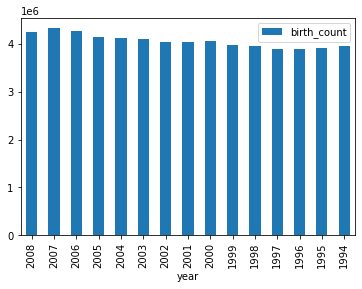

In [6]:
total_births.plot(kind="bar", x="year", y="birth_count")

In [7]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27rows/s]


<AxesSubplot:xlabel='wday'>

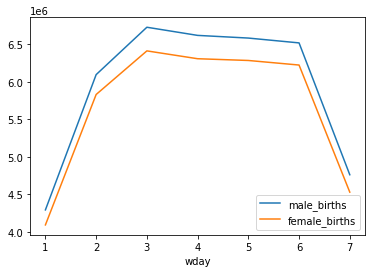

In [8]:
births_by_weekday.plot(x="wday")